In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
sales = pd.read_csv("data/sales_data.csv")

In [15]:
sales.head()

,order_number,order_date,sku_id,warehouse_id,customer_type,order_quantity,unit_sale_price,revenue
0,SO - 018900,2021-01-01,3551CA,GUT930,Export,105.00,7.07,742
1,SO - 018901,2021-01-01,3079BA,AXW291,Wholesale,151.00,134.50,20310
2,SO - 018902,2021-01-01,3250CA,AXW291,Distributor,300.00,34.75,10426
3,SO - 018903,2021-01-01,1161AA,GUT930,Wholesale,50.00,136.59,6830
4,SO - 018904,2021-01-01,3512AA,GUT930,Distributor,1000.00,0.10,103


In [16]:
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales = sales.set_index('order_date')

In [17]:
def create_time_series_features(df: pd.DataFrame):
    features = {
        'quarter': df.index.quarter,
        'day_of_week': df.index.dayofweek,
        'date_and_month': df.index.strftime('%m %b'),
        'month': df.index.month,
        'year': df.index.year,
        'day_of_month': df.index.day,
        'week_of_year': df.index.isocalendar().week
    }

    for feature_name, feature_values in features.items():
        df[feature_name] = feature_values

    return df

sales = create_time_series_features(sales)


Exploratory Data Analysis

Multiple analysis can be conducted to understand what had happended previously and we can take decision depending on it. For this EDA, three different analysis are done: Seasonal Analysis and year-over-year analysis.

On order_date
1)Seasonal Analysis- We will start by analyzing seasonality to identify months with higher and lower order volumes. This will help us understand if there are consistent seasonal patterns in the data.

In [18]:
monthly_order_quantity = sales.groupby(['year','date_and_month'])['order_quantity'].sum().reset_index()
monthly_order_quantity['month']=[x.split()[1] for x in monthly_order_quantity['date_and_month']]
monthly_order_quantity['year_month'] = monthly_order_quantity['year'].astype(str) + ' - ' +  monthly_order_quantity['month']

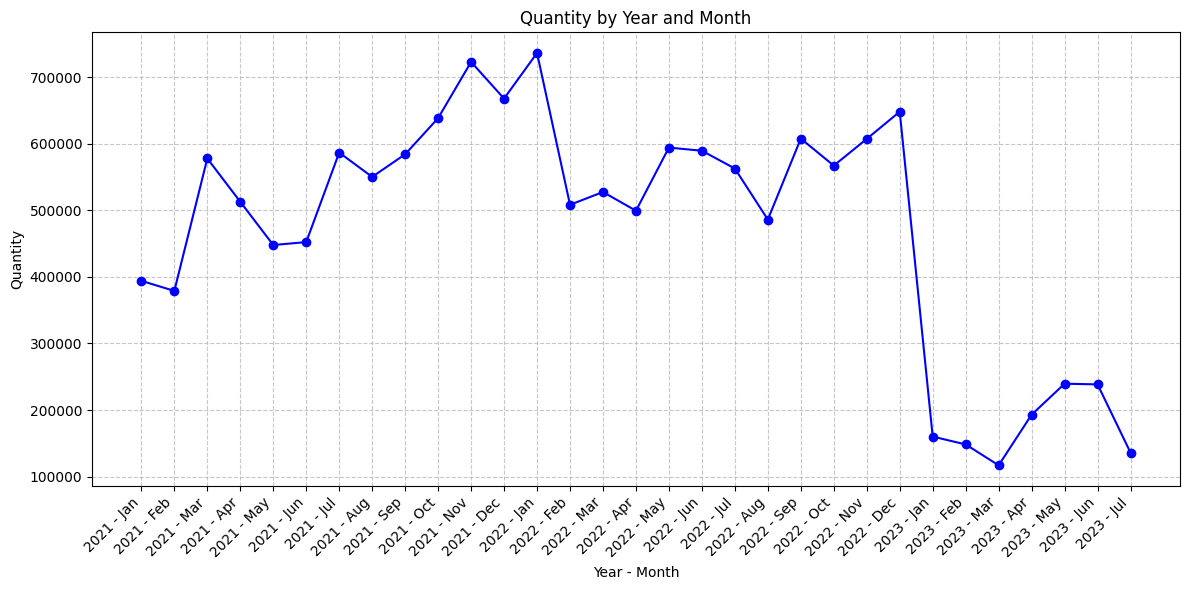

In [19]:
# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_order_quantity['year_month'], monthly_order_quantity['order_quantity'], marker='o', linestyle='-', color='b')
plt.xlabel('Year - Month')
plt.ylabel('Quantity')
plt.title('Quantity by Year and Month')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

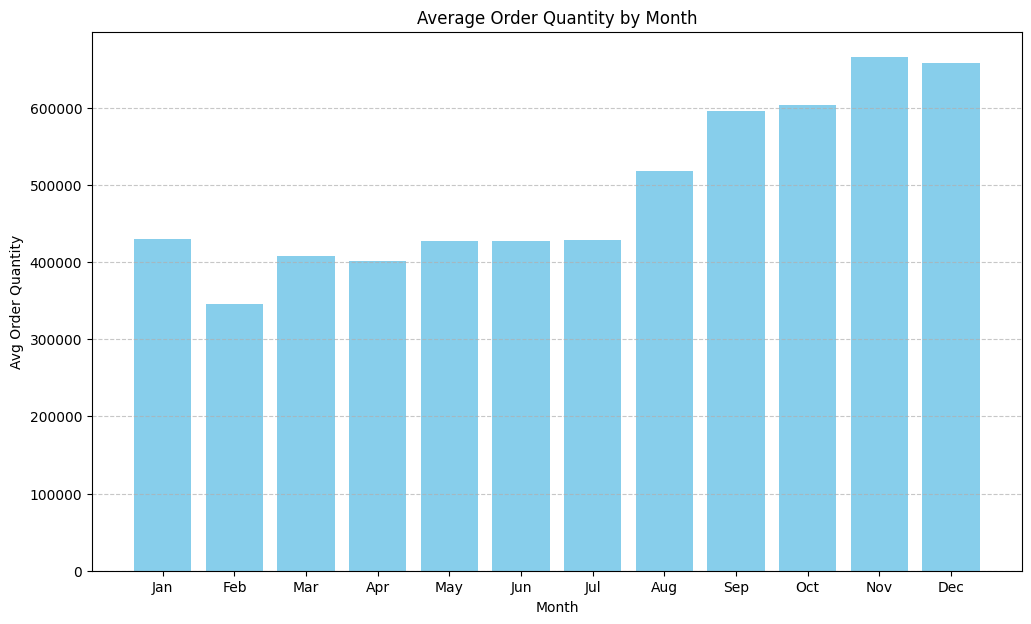

In [20]:
avg_monthly_order_quantity = monthly_order_quantity.groupby(['date_and_month','month'])['order_quantity'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 7))
plt.bar(avg_monthly_order_quantity['month'], avg_monthly_order_quantity['order_quantity'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Avg Order Quantity')
plt.title('Average Order Quantity by Month')
plt.xticks(avg_monthly_order_quantity['month'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)

Monthly Order Quantity Trend:

The first plot shows the monthly order quantities over time, indicating fluctuations and potential seasonal patterns.

Average Monthly Order Quantity:

The second plot, which averages the order quantities for each month across all years, helps identify which months consistently have higher or lower order quantities.

2)Weekdays analysis

In [21]:
avg_weekday_order_quantity= sales.groupby('day_of_week')['order_quantity'].mean().reset_index()

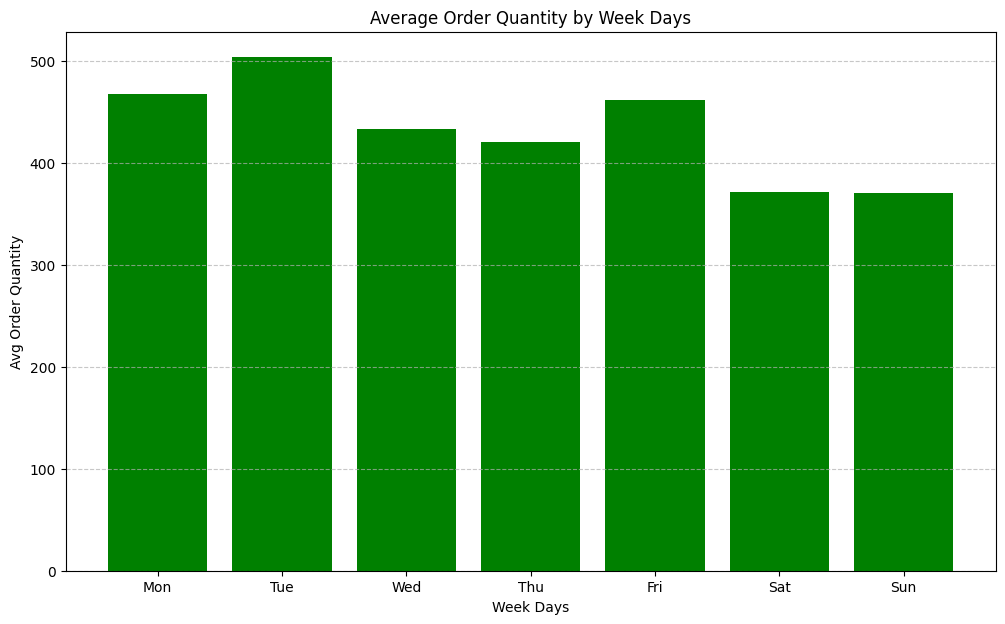

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 7))
plt.bar(avg_weekday_order_quantity['day_of_week'], avg_weekday_order_quantity['order_quantity'], color='green')
plt.xlabel('Week Days')
plt.ylabel('Avg Order Quantity')
plt.title('Average Order Quantity by Week Days')
plt.xticks(ticks=range(0,7), labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

3)Year-Over-Year comparison

<Figure size 1400x800 with 0 Axes>

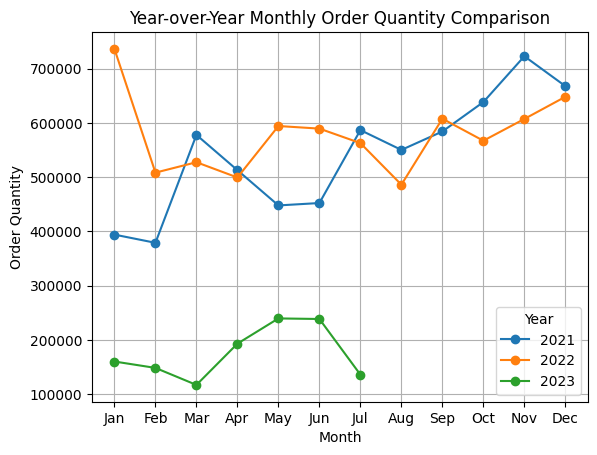

In [23]:
yoy_comparison_filtered = monthly_order_quantity.reset_index()
yoy_filtered= yoy_comparison_filtered.pivot(index=['date_and_month','month'], columns = 'year', values= 'order_quantity')

plt.figure(figsize=(14,8))
yoy_filtered.plot(marker='o')
plt.title("Year-over-Year Monthly Order Quantity Comparison")
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title = "Year")
plt.grid(True)
plt.show()

On customer_type

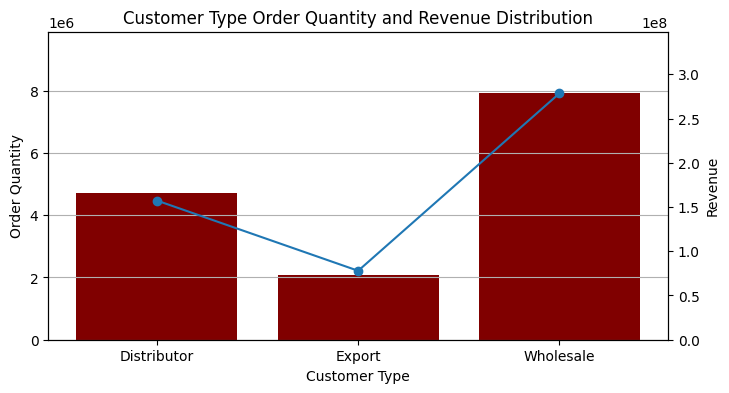

In [24]:
customers_order_quantity = sales.groupby('customer_type')['order_quantity'].sum().reset_index()
customers_revenue = sales.groupby('customer_type')['revenue'].sum().reset_index()

fig= plt.figure(figsize = (8,4))
ax1 = plt.subplot(1,1,1)
ax1.bar(customers_order_quantity['customer_type'], customers_order_quantity['order_quantity'], color = 'maroon')
ax1.set_ylim(0, customers_order_quantity['order_quantity'].max() * 1.25)
ax1.yaxis.grid(linestyle = '-')
ax1.set_xlabel('Customer Type')
ax1.set_ylabel('Order Quantity')

ax2 = plt.twinx()
ax2.plot(customers_revenue['customer_type'], customers_revenue['revenue'], marker='o')
ax2.set_ylim(0,customers_revenue['revenue'].max() * 1.25)
ax2.set_ylabel('Revenue')

plt.title('Customer Type Order Quantity and Revenue Distribution')

plt.show()

On warehouses

In [25]:
warehouse_order_quantity = sales.groupby('warehouse_id')['order_quantity'].sum().reset_index()
warehouse_revenue = sales.groupby('warehouse_id')['revenue'].sum().reset_index()

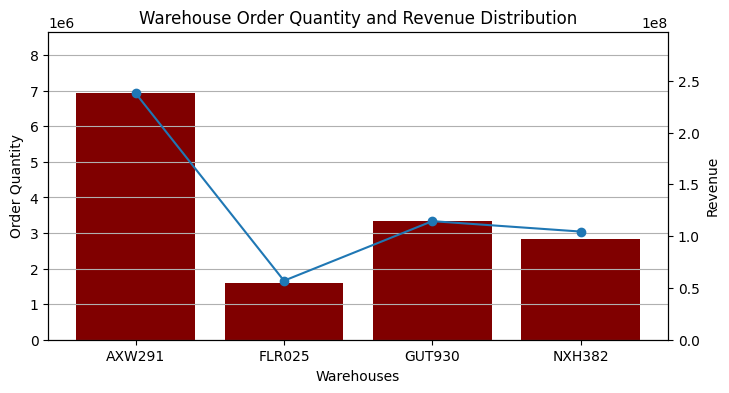

In [26]:
fig= plt.figure(figsize = (8,4))
ax1 = plt.subplot(1,1,1)
ax1.bar(warehouse_order_quantity['warehouse_id'], warehouse_order_quantity['order_quantity'], color = 'maroon')
ax1.set_ylim(0, warehouse_order_quantity['order_quantity'].max() * 1.25)
ax1.yaxis.grid(linestyle = '-')
ax1.set_xlabel('Warehouses')
ax1.set_ylabel('Order Quantity')

ax2 = plt.twinx()
ax2.plot(warehouse_revenue['warehouse_id'], warehouse_revenue['revenue'], marker='o')
ax2.set_ylim(0,warehouse_revenue['revenue'].max() * 1.25)
ax2.set_ylabel('Revenue')

plt.title('Warehouse Order Quantity and Revenue Distribution')

plt.show()

In [31]:
split_date = '2023-02-28'

In [32]:
train = sales.loc[sales.index < split_date]
test = sales.loc[sales.index >= split_date]

In [33]:
train_grouped = train.groupby('order_date')['order_quantity'].sum()
test_grouped = test.groupby('order_date')['order_quantity'].sum()

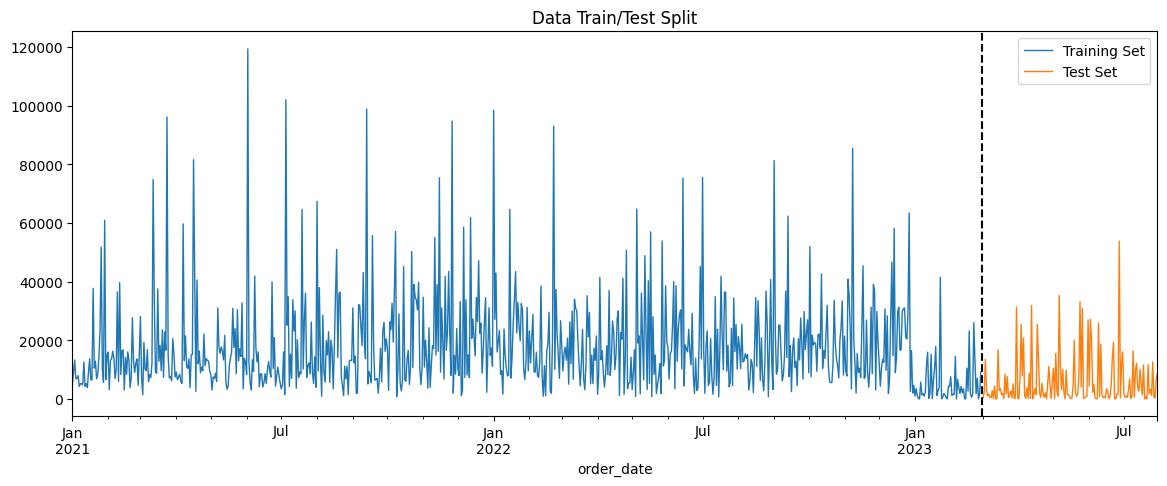

In [34]:
fig, ax = plt.subplots(figsize=(14,5))
train_grouped.plot(ax=ax, label='Training Set', title = 'Data Train/Test Split', linewidth=1, markersize=5)
test_grouped.plot(ax=ax, label='Test Set', linewidth=1, markersize=5)
ax.axvline(pd.Timestamp(split_date), color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()